In [1]:
# Cálculo de escurrimiento.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import geopandas as gpd

from scipy import integrate

In [2]:
# Dirección de los datos.
path = "../Material/Clases/Clase 14/"

# Directorio de escurrimiento
dir_esc = "Escurrimiento_infiltracion/"
# Datos hidrométricos.
hidro_n = dir_esc + "hd36080.csv"
# Contorno de las subcuencas.
subc_n  = dir_esc + "Zona_36080.shp"

# Cargamos los datos.
hidro = pd.read_csv(path + hidro_n)
subc  = gpd.read_file(path + subc_n)

# Creamos el índice.
# df.apply( lambda x: x[:-9] ) es equivalente a:
# def f(x):
#     return x[:-9]
# df.apply( f )
# Extraemos la fecha como texto.
hidro["pk_fecha"] = hidro["pk_fecha"].apply(lambda x: x[:-9])
# Extraemos la hora como texto.
hidro["pk_hora"]  = hidro["pk_hora"].apply(lambda x: f" {x:02d}:00")
# Concatenamos fecha y hora.
hidro["tiempo"]   =  hidro["pk_fecha"] + hidro["pk_hora"]
# Escogemos la columna como índice.
hidro = hidro.set_index("tiempo")
# Quitamos las columnas que ya no necesitamos.
hidro = hidro.drop( ["pk_fecha", "pk_hora"], axis = 1)
# Convertimos el índice a fecha.
hidro.index = pd.to_datetime( hidro.index )

hidro

,ngasto
tiempo,
1976-08-01 00:00:00,NaN
1976-08-11 23:00:00,NaN
1976-08-12 00:00:00,1.885500
1976-08-12 01:00:00,1.885500
1976-08-12 02:00:00,1.885500
...,...
2014-06-25 17:00:00,1.654000
2014-06-25 18:00:00,1.654000
2014-06-26 07:00:00,2.250000


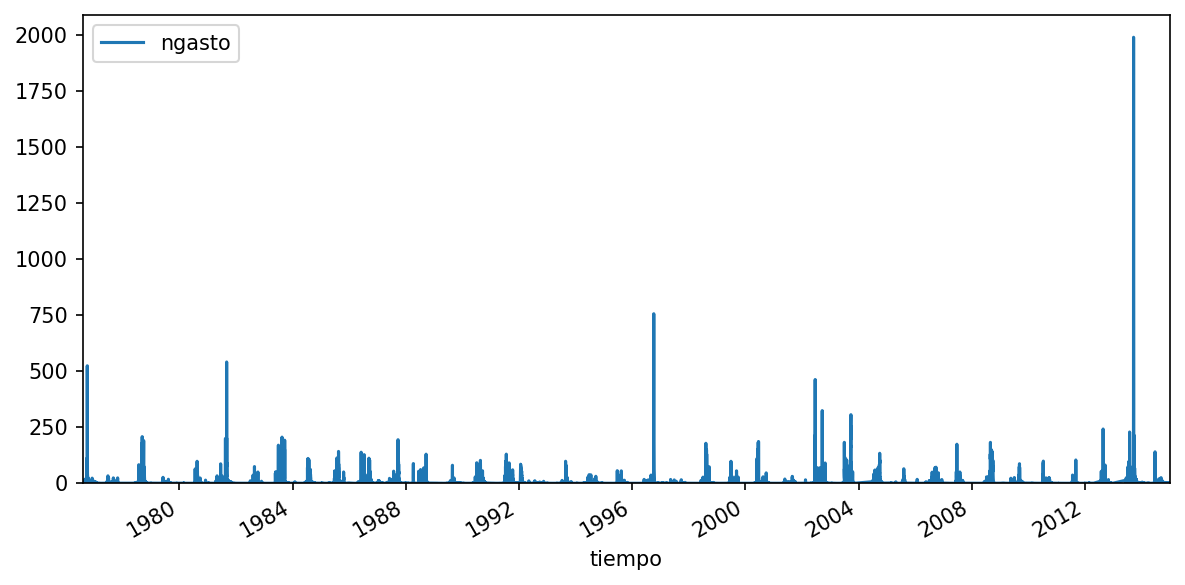

In [3]:
# Hidrograma de todo el periodo de registro.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Graficamos.
hidro.plot(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_xlim( hidro.index.min(), hidro.index.max() )

fig.tight_layout()
plt.show()

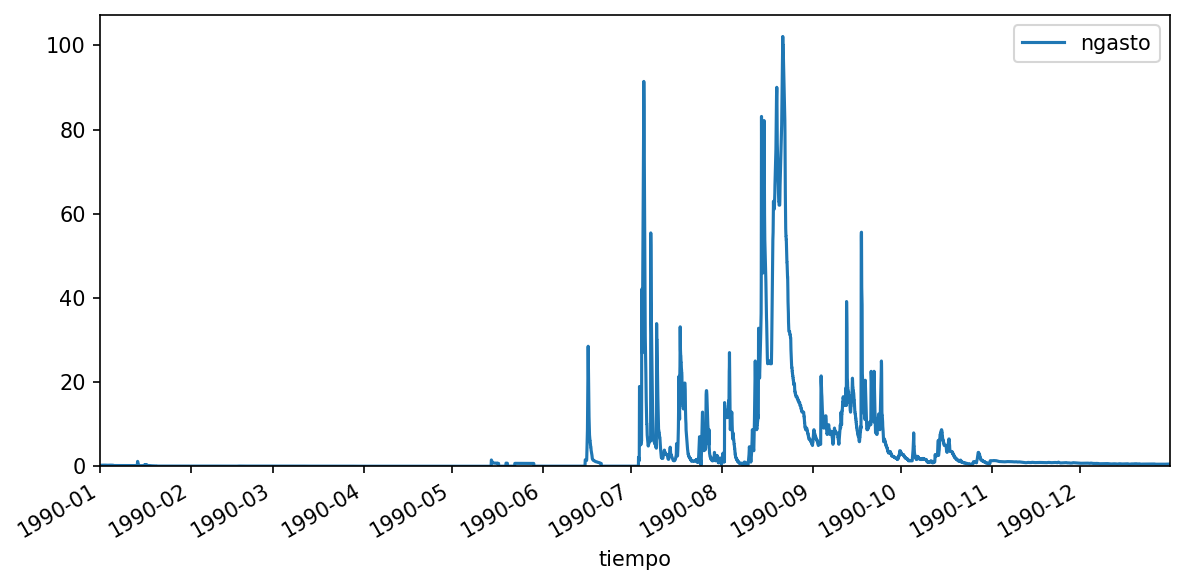

In [4]:
# Hidrograma para un año.

# Inicializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Seleccionamos un año.
years = [1990]
hidro_year = hidro[ hidro.index.year.isin( years ) ].copy()
# Gaficamos.
hidro_year.plot(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_xlim( hidro_year.index.min(), hidro_year.index.max() )

fig.tight_layout()
plt.show()

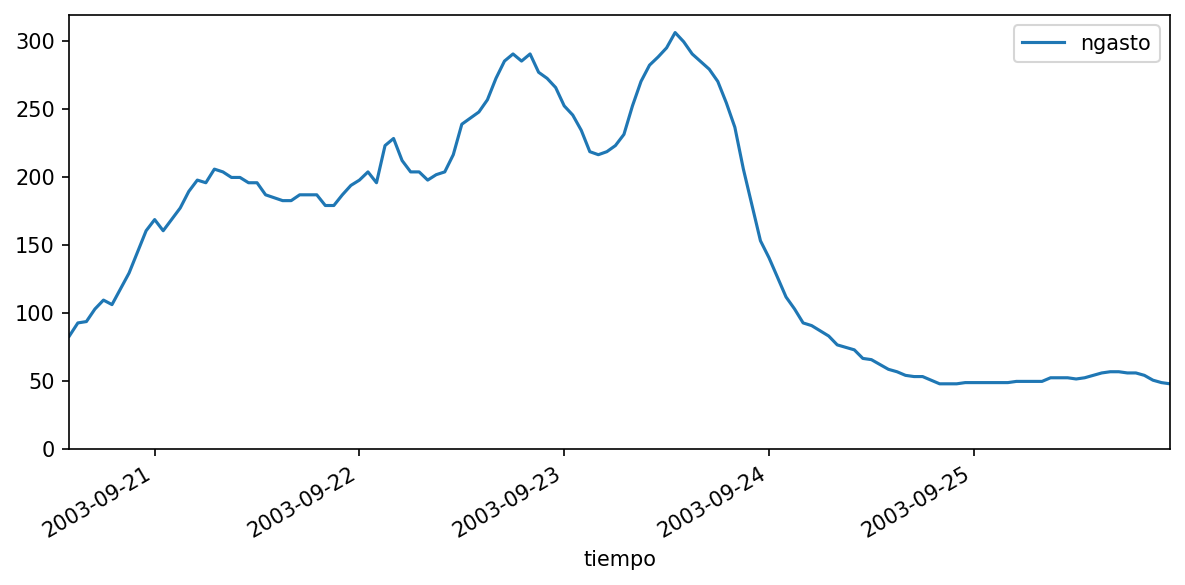

In [5]:
# Hidrograma para una tormenta.

# Inicializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Seleccionamos un año, mes, y días..
years  = [2003]
months = [8, 9]
hidro_storm = hidro[ hidro.index.year.isin( years )
    & hidro.index.month.isin( months )
    ]
# Inicio de la tormenta.
t_A = hidro_storm.index[597]
# Seleccionamos a partir del inicio y un final, por el momento, arbitrario.
hidro_storm = hidro_storm.loc[t_A:hidro_storm.index[-50]].copy()
# Graficamos.
hidro_storm.plot(ax = ax)

# Gasto pico.
t_q_max = hidro_storm["ngasto"].idxmax()

# Estilo.
ax.set_ylim(0)
ax.set_xlim( hidro_storm.index.min(), hidro_storm.index.max() )

fig.tight_layout()
plt.show()

In [6]:
# Verificamos los datos al inicio de la tormenta.
hidro_storm.head(10)

,ngasto
tiempo,
2003-09-20 14:00:00,83.1648
2003-09-20 15:00:00,92.7903
2003-09-20 16:00:00,93.7845
2003-09-20 17:00:00,103.0118
2003-09-20 18:00:00,109.5550
2003-09-20 19:00:00,106.2425
2003-09-20 21:00:00,129.4243
2003-09-20 23:00:00,160.4965
2003-09-21 00:00:00,168.6873


In [7]:
# Método de gastos desplazados.

hidro_storm["q_i+1"] = hidro_storm["ngasto"].shift(-1)
hidro_storm["q/q_i+1"] = hidro_storm["ngasto"] / hidro_storm["q_i+1"]


hidro_storm

,ngasto,q_i+1,q/q_i+1
tiempo,,,
2003-09-20 14:00:00,83.1648,92.7903,0.896266
2003-09-20 15:00:00,92.7903,93.7845,0.989399
2003-09-20 16:00:00,93.7845,103.0118,0.910425
2003-09-20 17:00:00,103.0118,109.5550,0.940275
2003-09-20 18:00:00,109.5550,106.2425,1.031179
...,...,...,...
2003-09-25 19:00:00,56.0533,54.2808,1.032654
2003-09-25 20:00:00,54.2808,50.7343,1.069903
2003-09-25 21:00:00,50.7343,48.9588,1.036265


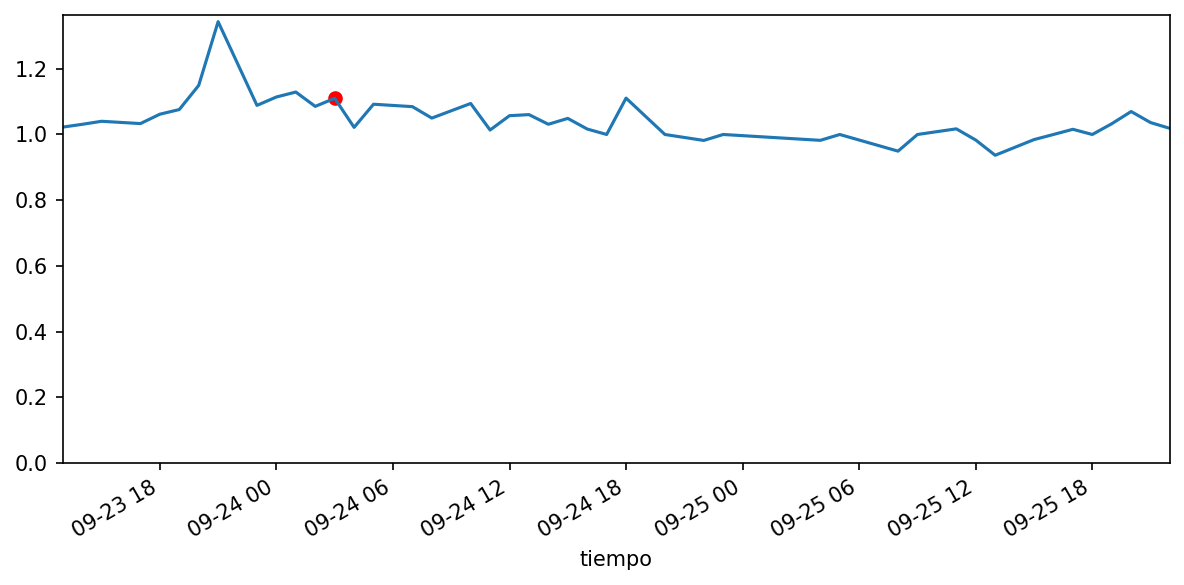

In [8]:
# Método de gastos desplazados.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Gastos desplazados.
hidro_storm["q_i+1"] = hidro_storm["ngasto"].shift(-1)
hidro_storm["q/q_i+1"] = hidro_storm["ngasto"] / hidro_storm["q_i+1"]
# Graficamos.
hidro_storm.loc[t_q_max:, "q/q_i+1"].plot(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_xlim( hidro_storm.loc[ [t_q_max] ].index, hidro_storm.index[-2] )
# Encontramos el índice del punto de cambio de pendiente.
#ax.set_xlim( hidro_storm.loc[[t_q_max]].index, hidro_storm.index[-10] )

# El punto de cambio de pendiente es el fin del escurrimiento directo.
t_D = hidro_storm.index[-33]
# Graficamos el punto D.
ax.scatter(t_D, hidro_storm.loc[t_D, "q/q_i+1"], color = "red")

fig.tight_layout()
plt.show()

In [9]:
# Separación de gasto base y directo.

# Seleccionamos la tormenta.
hidro_storm = hidro.loc[t_A:t_D].copy()
# Gasto base.
hidro_storm["Q_B"] = np.linspace( hidro_storm.iloc[0, 0],
    hidro_storm.iloc[-1, 0], hidro_storm.shape[0] )
# Gasto directo.
hidro_storm["Q_D"] = hidro_storm["ngasto"] - hidro_storm["Q_B"]
# Tiempo que pasa desde el inicio.
delta = hidro_storm.index - hidro_storm.index[0]
# Convertimos a segundo.s
hidro_storm["seconds"] = delta.days * 86400 + delta.seconds

# Integramos el tiempo en segundos y los gastos
# para obtener los volúmenes de escurrimiento.
V_B = integrate.simpson(hidro_storm["Q_B"], hidro_storm["seconds"])
V_D = integrate.simpson(hidro_storm["Q_D"], hidro_storm["seconds"])

# Calculamos la precipitación en exceso.
h_e = V_D * 1000 / subc.area[0]

# Tiempo pico y tiempo base en horas.
t_p = hidro_storm.loc[t_q_max, "seconds"] / 3600 
t_b = hidro_storm["seconds"].max() / 3600 

print(f"Volumen de escurrimiento base   : {V_B:7.0f} m^3")
print(f"Volumen de escurrimiento directo: {V_D:7.0f} m^3")
print()
print(f"precipitación en exceso         : {h_e:7.2f} mm")
print()

hidro_storm

Volumen de escurrimiento base   : 28428417 m^3
Volumen de escurrimiento directo: 35356300 m^3

precipitación en exceso         :    3.47 mm



,ngasto,Q_B,Q_D,seconds
tiempo,,,,
2003-09-20 14:00:00,83.1648,83.164800,0.000000,0
2003-09-20 15:00:00,92.7903,83.422553,9.367747,3600
2003-09-20 16:00:00,93.7845,83.680306,10.104194,7200
2003-09-20 17:00:00,103.0118,83.938060,19.073740,10800
2003-09-20 18:00:00,109.5550,84.195813,25.359187,14400
...,...,...,...,...
2003-09-23 23:00:00,153.1487,101.980787,51.167913,291600
2003-09-24 00:00:00,140.6870,102.238540,38.448460,295200
2003-09-24 01:00:00,126.2710,102.496294,23.774706,298800


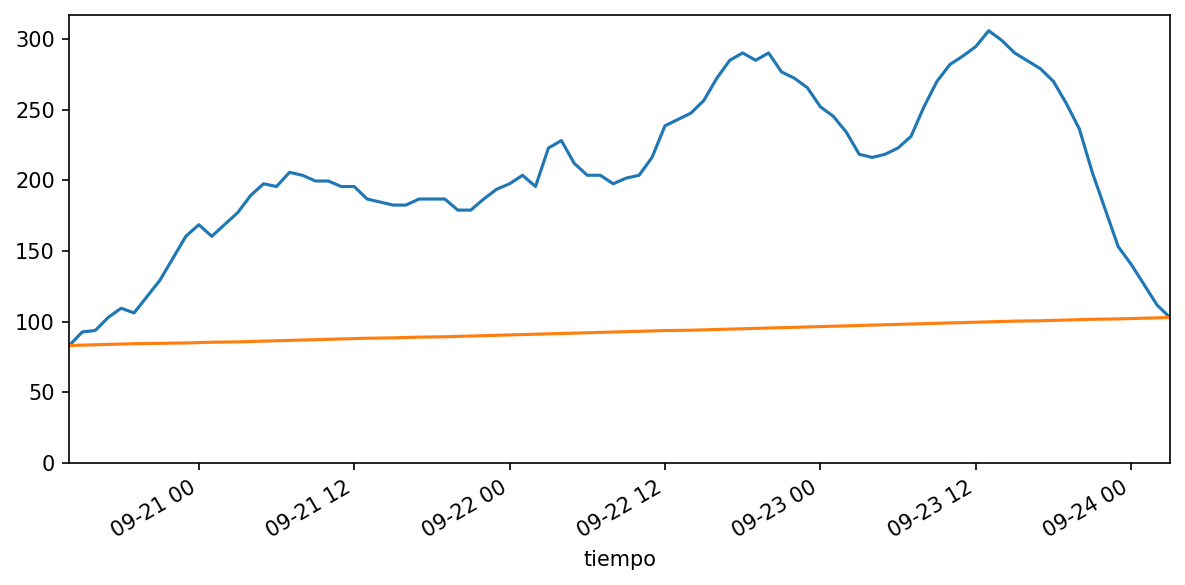

In [10]:
# Gasto base.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Gasto total.
hidro_storm["ngasto"].plot(ax = ax)
# Gasto base.
hidro_storm["Q_B"].plot(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_xlim( hidro_storm.index.min(), hidro_storm.index.max() )

fig.tight_layout()
plt.show()

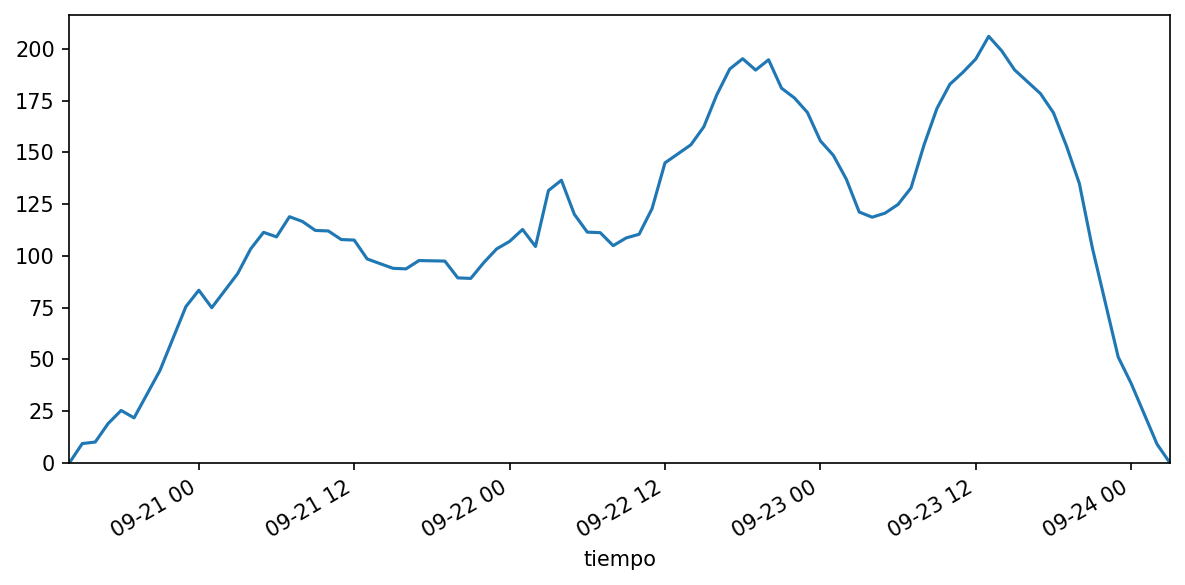

In [11]:
# Gasto directo.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 4)
fig.set_dpi(150) 

# Gasto directo.
hidro_storm["Q_D"].plot(ax = ax)

# Estilo.
ax.set_ylim(0)
ax.set_xlim( hidro_storm.index.min(), hidro_storm.index.max() )

fig.tight_layout()
plt.show()

In [12]:
# Tarea.
# Para la tormenta estudiada en clase, calcula la precipitación en exceso
# para los 4 casos que surgen de combinar los siguientes métodos y compara.
# 1. Punto D: tiempo de vaciado y gastos desplazados.
# 2. Gasto base: pendiente desde punto A a D y recta de punto A hasta
# gasto pico seguida de pendiente hasta punto D.
# Encuentra alguna otra tormenta en el registro y calcula la precipitación
# en exceso utilizando solo un método.